In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
time_results = pd.read_csv("runs/run4/time_results.csv", encoding = "utf-8")
time_results.head(20)

#related_results_1000 = pd.read_csv("runs/run3/multitiered_1000_related.csv")
#random_results_1000 = pd.read_csv("runs/run3/multitiered_1000_random.csv")
#fifty_fifty_results_1000 = pd.read_csv("runs/run3/multitiered_1000_fifty_fifty.csv")

,Corpus Type,Multi-tiered,Size,Time elapsed (seconds)
0,related,True,10,3.271796
1,related,False,10,5.691232
2,random,True,10,2.251463
3,random,False,10,3.158919
4,fifty_fifty,True,10,1.566273
5,fifty_fifty,False,10,3.590185
6,related,True,50,13.526689
7,related,False,50,25.759857
8,random,True,50,4.124873
9,random,False,50,7.702067


In [33]:
def time_elapsed_line_graph(df, corpus_type, analysis_type):
    df[df["Corpus Type"].str.contains(corpus_type)].loc[df['Multi-tiered'] == analysis_type].plot(x='Size', y='Time elapsed (seconds)', kind='line', figsize=(6,4))
    plt.ylim(0, 675)
    if(analysis_type):
        analysis_type = "Multi-tiered"
    else:
        analysis_type = "Regular"
    plt.title(analysis_type + " analysis | " + corpus_type + " corpus")
    fig = plt.gcf()
    fig.savefig("plots/" + analysis_type + "_" + "analysis_" + corpus_type + "_corpus")
    plt.show()

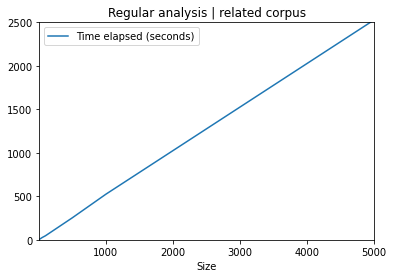

In [28]:
time_elapsed_line_graph(time_results, "related", False)

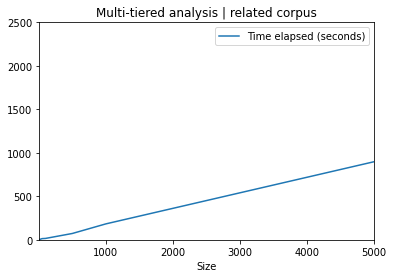

In [29]:
time_elapsed_line_graph(time_results, "related", True)

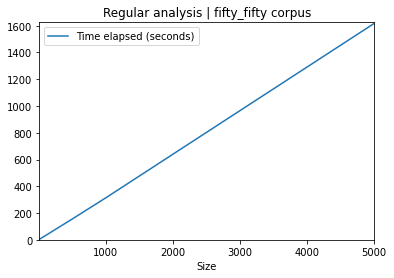

In [31]:
time_elapsed_line_graph(time_results, "fifty_fifty", False)

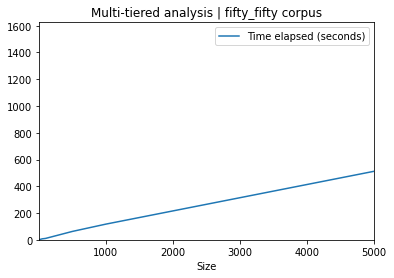

In [32]:
time_elapsed_line_graph(time_results, "fifty_fifty", True)

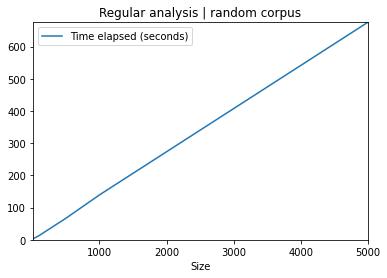

In [34]:
time_elapsed_line_graph(time_results, "random", False)

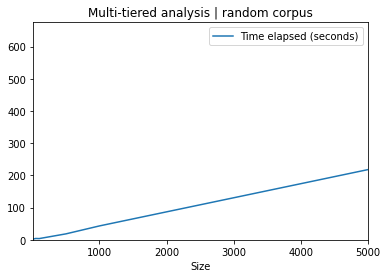

In [35]:
time_elapsed_line_graph(time_results, "random", True)

In [134]:
def tier_check(related_df, fifty_fifty_df, random_df):
    df = pd.DataFrame(columns = ['Corpus Type', 'Articles Filtered'])
    
    df = df.append({
        "Corpus Type": "Related",
        "Articles Filtered": related_df[related_df["Main Analysis"].isnull()].shape[0]
    }, ignore_index = True)
    
    df = df.append({
        "Corpus Type": "Fifty Fifty",
        "Articles Filtered": fifty_fifty_df[fifty_fifty_df["Main Analysis"].isnull()].shape[0]
    }, ignore_index = True)
    
    df = df.append({
        "Corpus Type": "Random",
        "Articles Filtered": random_df[random_df["Main Analysis"].isnull()].shape[0]
    }, ignore_index = True)
    
    return df

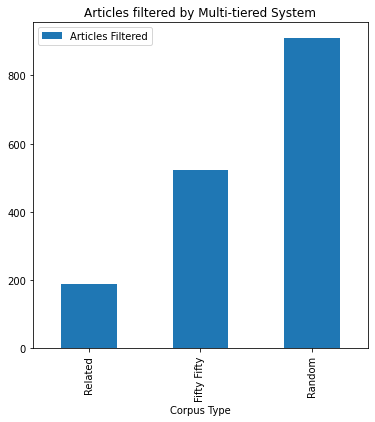

In [150]:
skip_count = tier_check(related_results_1000, fifty_fifty_results_1000, random_results_1000,)
skip_count.plot(x="Corpus Type", y="Articles Filtered", kind = 'bar', figsize=(6,6))
plt.title("Articles filtered by Multi-tiered System")
skip_fig = plt.gcf()
skip_fig.savefig('plots/articles_skipped.png')